In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
class Market:
    def __init__(self, a_d, b_d, a_z, b_z, tax):
        self.a_d = a_d
        self.b_d = b_d
        self.a_z = a_z
        self.b_z = b_z
        self.tax = tax
        self.eprice = 0
        self.equantity = 0
        
    def price(self):
        '''
        The equilibrium price of the market.
        '''
        self.eprice = (self.a_d - self.a_z + self.b_z * self.tax) / (self.b_z + self.b_d)
        return self.eprice
    
    def quantity(self):
        '''
        The equilibrium quantity of the market.
        '''
        self.equantity = self.a_d - self.b_d * (self.a_d - self.a_z + self.b_z * self.tax) / (self.b_z + self.b_d)
        return self.equantity
    
    def tax_revenue(self):
        '''
        Total tax revenue extracted from the market.
        '''
        return self.tax * self.equantity 
        # 问题是，如果不执行free_m.quantity, 就不会有self.equantity这个值，那这里就算不对。
        # 怎么改？
    
    def consumer_surplus(self):
        '''
        The consumer surplus of the equilibrium market.
        '''
        import scipy.integrate
        f = lambda q: (self.a_d - q) / self.b_d - self.eprice
        cs = scipy.integrate.quad(f, 0, self.equantity) 
        # 问题是，如果不执行free_m.quantity, 就不会有self.equantity这个值，那这里就算不对。
        # 以及，这里的cs是一个tuple，而要求的是一个number。
        return cs
    
    def producer_surplus(self):
        '''
        The producer surplus of the equilibrium market.
        '''
        import scipy.integrate
        g = lambda q:self.eprice - (q - self.a_z + self.b_z * self.tax) / self.b_z
        ps = scipy.integrate.quad(g, 0, self.equantity)
        # 问题是，如果不执行free_m.quantity, 就不会有self.equantity这个值，那这里就算不对。
        return ps
    
    def demand(self, *args):
        '''
        The demand of goods at a given price.
        
        Parameters:
            p: the input price.
            
        Return:
            demand: the demand of goods.
        '''
        # assert(isinstance(args, (int, float))),'Price should be numbers!'
        d = [self.a_d - self.b_d * p for p in args]
        return d
    
    def supply(self, *args):
        '''
        The supply of goods at a given price.
        
        Parameters:
            p: the input price.
            
        Return:
            supply: the supply of goods.
        '''
        # assert(isinstance(p, (int, float))),'Price should be numbers!'
        s = [self.a_z + self.b_z * (p - self.tax) for p in args]
        return s
    
    def supply_no_tax(self, *args):
        '''
        The supply of goods at a given price without tax
        
        Parameters:
            p: the input price.
            
        Return:
            supply: the supply of goods without tax
        '''
        # assert(isinstance(p, (int, float))),'Price should be numbers!'
        s_n = [self.a_z + self.b_z * p for p in args]
        return s_n

In [12]:
free_m = Market(a_d = 15, b_d = 0.5, a_z = -2, b_z = 0.5, tax = 3)

# 这里还可以这么写：
# baseline_params = 15, .5, -2, .5, 3
# free_m = Market(*baseline_params)

In [17]:
free_m.demand(10, 11, 12)

[10.0, 9.5, 9.0]

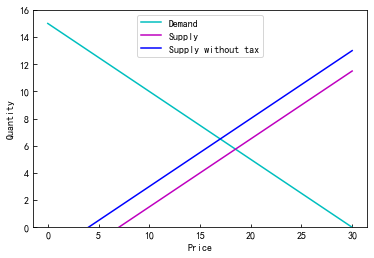

In [175]:
#### 宝贝，经济里纵轴不是价格嘛？横轴是数量？ ####

price = np.arange(0, 31, 1)
#plt.plot(price, np.asarray(free_m.demand(price)))
plt.plot(price, np.asarray(free_m.demand(price)).flatten(), color='c' )
# 这里也可以用np.array(free_m.demand(price))，我其实不知道np.array和np.asarray的区别
plt.plot(price, np.asarray(free_m.supply(price)).flatten(), color='m' )
plt.plot(price, np.asarray(free_m.supply_no_tax(price)).flatten(), color='b' )
plt.xlabel('Price')
plt.ylabel('Quantity')
plt.ylim(0, 16)
plt.tick_params(direction='in')
plt.legend(['Demand', 'Supply', 'Supply without tax'])
# 这样其实不知道哪个对应的是哪个，可以像我下面这样，用label写
plt.show()

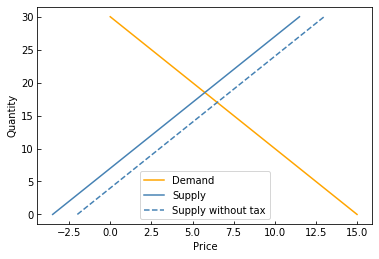

In [27]:
fig, ax = plt.subplots(figsize=(6, 4))

price = np.arange(0, 31, 1)

plt.plot(np.asarray(free_m.demand(price)).flatten(), price,
         color='orange', label='Demand')

plt.plot(np.asarray(free_m.supply(price)).flatten(), price, 
         color='steelblue', label='Supply')

plt.plot(np.asarray(free_m.supply_no_tax(price)).flatten(), price,
         color='steelblue', label='Supply without tax', linestyle='--')

plt.xlabel('Price')
plt.ylabel('Quantity')

#plt.ylim(0, 16)
plt.tick_params(direction='in')
plt.legend()
plt.show()